# CHAPTER 6


# Decision Trees and Ensemble Learning

## 6.1 Credit risk scoring project

* * Dataset: https://github.com/gastonstat/CreditScoring

In [314]:
# Import the neccesary libaries
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## 6.2 Data cleaning and preparation

* Downloading the dataset
* Re-encoding the categorical variables
* Doing the train/validation/test split

In [315]:
df = pd.read_csv('data.csv')

In [316]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [317]:
df.shape

(4455, 14)

In [318]:
# check the data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Status     4455 non-null   int64
 1   Seniority  4455 non-null   int64
 2   Home       4455 non-null   int64
 3   Time       4455 non-null   int64
 4   Age        4455 non-null   int64
 5   Marital    4455 non-null   int64
 6   Records    4455 non-null   int64
 7   Job        4455 non-null   int64
 8   Expenses   4455 non-null   int64
 9   Income     4455 non-null   int64
 10  Assets     4455 non-null   int64
 11  Debt       4455 non-null   int64
 12  Amount     4455 non-null   int64
 13  Price      4455 non-null   int64
dtypes: int64(14)
memory usage: 487.4 KB


In [319]:
# conver the columnsname to lower case
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [320]:
# check the value counts of the dataset
df.nunique()

status          3
seniority      47
home            7
time           11
age            50
marital         6
records         2
job             5
expenses       94
income        353
assets        160
debt          183
amount        285
price        1419
dtype: int64

In [321]:
# check the content of the 'status columns' to know the distribution of the categotical data 
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

This indicates that the columns contains 3 categorical data,and this is the reason why we need to re-encode the categorical variables.

The status column is the target variable, and it is a binary variable. The other columns are the features.

In [322]:
# mapping the dataset to the correct values

# defining the content of the columns
status_values = {1: "ok", 2: "default", 0: "unknown"}

# mapping the content of the column to a values 
df.status = df.status.map(status_values)

In [323]:
# checking the implcation of the maping on status. 
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [324]:
# Mapping of the other columns in the dataset 

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [325]:
# check the data types after the conversion 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   status     4455 non-null   object
 1   seniority  4455 non-null   int64 
 2   home       4455 non-null   object
 3   time       4455 non-null   int64 
 4   age        4455 non-null   int64 
 5   marital    4455 non-null   object
 6   records    4455 non-null   object
 7   job        4455 non-null   object
 8   expenses   4455 non-null   int64 
 9   income     4455 non-null   int64 
 10  assets     4455 non-null   int64 
 11  debt       4455 non-null   int64 
 12  amount     4455 non-null   int64 
 13  price      4455 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 487.4+ KB


In [326]:
# view the dataset after the conversion
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [327]:
# check for the missing values in the dataset
# The result from the income columns shows that there are no missing values in the dataset
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


In [328]:
# Despite the fact that the income column has no missing values, the dataset has missing values.
# This is because the income columns has an arbitrary value of 99999999 which is not a valid value for the income column
df.isna().sum()

status       0
seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64

In [329]:
# check for the highest value in the income column
df.income.max()

99999999

In [330]:
# replacing the missing values in the income columns with the nan of the income columns
df.income.replace(99999999, np.nan)

0       129.0
1       131.0
2       200.0
3       182.0
4       107.0
        ...  
4450     92.0
4451     75.0
4452     90.0
4453    140.0
4454    140.0
Name: income, Length: 4455, dtype: float64

In [331]:
# checking for highest value in the income columns after replacing the missing values
df.income.max()

99999999

In [332]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


After the knownledge of the data, we can start the data cleaning and preparation, we can write a function to do the same for assets, debts columns.

In [333]:
# check the max in each of the columns
for c in df.columns:
    print(c, df[c].max())

status unknown
seniority 48
home unk
time 72
age 68
marital widow
records yes
job unk
expenses 180
income 99999999
assets 99999999
debt 99999999
amount 5000
price 11140


In [334]:
# function to check for the missing values in the dataset, and replace the missing values with nan

for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(99999999, np.nan)

In [335]:
# confiming the replacement of the missing values in the dataset with the decsribe function
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4421.000000,4408.000000,4437.000000,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,130.568197,5403.433984,342.948614,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,86.367434,11573.161523,1245.861736,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,165.000000,6000.000000,0.000000,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000


In [336]:
# Recheck the max in each of the columns
for c in df.columns:
    print(c, df[c].max())

status unknown
seniority 48
home unk
time 72
age 68
marital widow
records yes
job unk
expenses 180
income 959.0
assets 300000.0
debt 30000.0
amount 5000
price 11140


In [337]:
df.status.value_counts()

status
ok         3200
default    1254
unknown       1
Name: count, dtype: int64

In [338]:
df.shape

(4455, 14)

it will be recall the 'status' column' has 3 values, and one of which is 'uknown' which is not useful for the model, so we will remove it.


In [339]:
df = df[df.status != 'unkown']

In [340]:
# reset the index of the dataset
df = df[df.status != 'unkown'].reset_index(drop=True)

In [389]:
# check the shape of the dataset after removing the unknown values
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910


In [390]:
df.shape

(4455, 14)

In [391]:
# import the model from the sklearn library
from sklearn.model_selection import train_test_split

# split the dataset into train and test dataset
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)

# split the train dataset into train and validation dataset
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [392]:
len(df_train), len(df_val), len(df_test)

(2673, 891, 891)

In [393]:
# check the index of the train dataset
df_train.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
2815,default,3,rent,36,61,married,no,fixed,41,57.0,12000.0,0.0,2500,3559
1461,default,5,rent,48,30,separated,yes,partime,39,41.0,0.0,0.0,1300,1600
2935,ok,15,owner,60,32,divorced,no,freelance,35,0.0,6000.0,3300.0,1550,1612
1312,default,2,rent,12,47,married,yes,fixed,103,426.0,0.0,0.0,350,450
688,default,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330


In [394]:
# reset the index of the dataset
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [395]:
# check the index of the train dataset
df_train.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,default,3,rent,36,61,married,no,fixed,41,57.0,12000.0,0.0,2500,3559
1,default,5,rent,48,30,separated,yes,partime,39,41.0,0.0,0.0,1300,1600
2,ok,15,owner,60,32,divorced,no,freelance,35,0.0,6000.0,3300.0,1550,1612
3,default,2,rent,12,47,married,yes,fixed,103,426.0,0.0,0.0,350,450
4,default,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330


In [396]:
# confirm the data types of the status columns
# the data type of the status columns is an object
# it needs to be comnverted to a numerical data type
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2673 entries, 0 to 2672
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   status     2673 non-null   object 
 1   seniority  2673 non-null   int64  
 2   home       2673 non-null   object 
 3   time       2673 non-null   int64  
 4   age        2673 non-null   int64  
 5   marital    2673 non-null   object 
 6   records    2673 non-null   object 
 7   job        2673 non-null   object 
 8   expenses   2673 non-null   int64  
 9   income     2655 non-null   float64
 10  assets     2642 non-null   float64
 11  debt       2662 non-null   float64
 12  amount     2673 non-null   int64  
 13  price      2673 non-null   int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 292.5+ KB


In [397]:
# assigning the target columns to the y_train, y_val and y_test

y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [398]:
# drop the status columns from the dataset
df_train = df_train.drop(columns='status')
df_val = df_val.drop(columns='status')
df_test = df_test.drop(columns='status')

In [399]:
# check the datase after dropping the status columns
df_train.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,3,rent,36,61,married,no,fixed,41,57.0,12000.0,0.0,2500,3559
1,5,rent,48,30,separated,yes,partime,39,41.0,0.0,0.0,1300,1600
2,15,owner,60,32,divorced,no,freelance,35,0.0,6000.0,3300.0,1550,1612
3,2,rent,12,47,married,yes,fixed,103,426.0,0.0,0.0,350,450
4,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330


In [400]:
# fill the missing values in the dataset with zero of the columns
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)

#### One-hot encoding

In [401]:
df_train = df_train.fillna(0) 
df_val = df_val.fillna(0)

In [354]:
# convert the dataset to a dictionary
dict_train = df_train.to_dict(orient='records')
dict_val = df_val.to_dict(orient='records')

In [355]:
# check the dictionary after converting the dataset to a dictionary
dict_train[0]

{'seniority': 3,
 'home': 'rent',
 'time': 36,
 'age': 61,
 'marital': 'married',
 'records': 'no',
 'job': 'fixed',
 'expenses': 41,
 'income': 57.0,
 'assets': 12000.0,
 'debt': 0.0,
 'amount': 2500,
 'price': 3559}

This list of dictionaries now can be used as input to DictVectorizer:

In [356]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

In [357]:
# fit the dictionary to the dataset
X_train = dv.fit_transform(dict_train) 
X_val = dv.transform(dict_val)

# get feature names
feature_names = dv.get_feature_names_out()
feature_names

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'marital=divorced', 'marital=married',
       'marital=separated', 'marital=single', 'marital=unk',
       'marital=widow', 'price', 'records=no', 'records=yes', 'seniority',
       'time'], dtype=object)

In [358]:
# fit the dictionary to the dataset
X_train = dv.fit_transform(dict_train) 


X_val = dv.transform(dict_val)

In [359]:
X_train

array([[6.10e+01, 2.50e+03, 1.20e+04, ..., 0.00e+00, 3.00e+00, 3.60e+01],
       [3.00e+01, 1.30e+03, 0.00e+00, ..., 1.00e+00, 5.00e+00, 4.80e+01],
       [3.20e+01, 1.55e+03, 6.00e+03, ..., 0.00e+00, 1.50e+01, 6.00e+01],
       ...,
       [4.70e+01, 3.50e+02, 0.00e+00, ..., 0.00e+00, 2.30e+01, 2.40e+01],
       [5.80e+01, 1.50e+03, 4.50e+04, ..., 0.00e+00, 5.00e+00, 6.00e+01],
       [2.20e+01, 1.25e+03, 1.00e+04, ..., 0.00e+00, 4.00e+00, 4.80e+01]])

In [360]:
X_val

array([[3.7e+01, 1.0e+03, 5.0e+03, ..., 0.0e+00, 3.0e+00, 3.6e+01],
       [2.4e+01, 1.2e+03, 3.5e+03, ..., 0.0e+00, 1.0e+00, 3.6e+01],
       [4.0e+01, 7.0e+02, 0.0e+00, ..., 1.0e+00, 1.7e+01, 2.4e+01],
       ...,
       [3.1e+01, 1.5e+03, 9.0e+03, ..., 1.0e+00, 1.0e+00, 6.0e+01],
       [2.5e+01, 8.5e+02, 5.0e+03, ..., 0.0e+00, 6.0e+00, 2.4e+01],
       [2.4e+01, 4.0e+02, 0.0e+00, ..., 0.0e+00, 1.0e+00, 2.4e+01]])

## 6.3 Decision trees

* How a decision tree looks like
* Training a decision tree 
* Overfitting
* Controlling the size of a tree

In [361]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'
        

    

The above function is to check the generic classification of client if they will detault base on two criterial of either being a part-time worker or having an assets greater than 6000. 
We can call the function to view the first index of the dataset as thus:

In [362]:
# view the first row of the dataset, and convert it to a dictionary
xi = df_train.iloc[0].to_dict()

In [363]:
# check the output of the function
xi

{'seniority': 3,
 'home': 'rent',
 'time': 36,
 'age': 61,
 'marital': 'married',
 'records': 'no',
 'job': 'fixed',
 'expenses': 41,
 'income': 57.0,
 'assets': 12000.0,
 'debt': 0.0,
 'amount': 2500,
 'price': 3559}

In [364]:
# check the output of the function
assess_risk(xi)

'ok'

After the testing of the function, we can now import the DecisionTreeClassifier from the sklearn library to train the model. The model is trained on the training set and the accuracy is calculated on the validation set.  The followings library will be import 

In [365]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

## 6.4 Decision tree learning algorithm

* Finding the best split for one column
* Finding the best split for the entire dataset
* Stopping criteria
* Decision tree learning algorithm

In [366]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [367]:
dt = DecisionTreeClassifier(max_depth=2)
clf = dt.fit(X_train, y_train)
clf

DecisionTreeClassifier(max_depth=2)

checking the results on y_train and y_pred, we can see the result is 100% accurate, this is because the model is overfitting.

In [368]:
y_pred = dt.predict_proba(X_train)[:, 1] 
roc_auc_score(y_train, y_pred)

0.7017132266649385

When we execute it, we see that the score is 100% — the perfect score. Does it mean that we can predict default without errors? Let’s check the score on validation before jumping to conclusions:

In [369]:
y_pred = dt.predict_proba(X_val)[:, 1] 
roc_auc_score(y_val, y_pred)

0.6876073869887143

After running, we see that AUC on validation is only 65%.

#### printing the tree


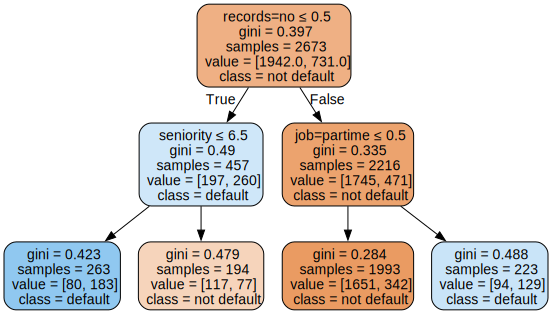

In [370]:
import graphviz
from numpy import dot
from sklearn import tree

dot_data = tree.export_graphviz(clf, 
                                out_file=None,
                                feature_names= feature_names, 
                                class_names=["not default", "default"],
                                filled=True, 
                                rounded=True, 
                                special_characters=True
                                )

graph = graphviz.Source(dot_data)
graph

## 6.5 Decision trees parameter tuning

* selecting `max_depth`
* selecting `min_samples_leaf`

This is to check the `max_depth` of the tree

In [371]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    
    y_pred= dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s - > %.3f' % (d, auc))

   1 - > 0.613
   2 - > 0.688
   3 - > 0.763
   4 - > 0.779
   5 - > 0.784
   6 - > 0.768
  10 - > 0.689
  15 - > 0.666
  20 - > 0.665
None - > 0.659


Having confirm that the best `max_depth` is between 4,5,6.. we can iterate over the `min_samples_leaf` to ascetain the best best selection too. 

In [372]:
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [373]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [374]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.779  0.784  0.768
5                 0.779  0.786  0.787
10                0.774  0.783  0.792
15                0.771  0.780  0.795
20                0.784  0.785  0.799
100               0.767  0.786  0.793
200               0.765  0.778  0.789
500               0.671  0.671  0.671

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

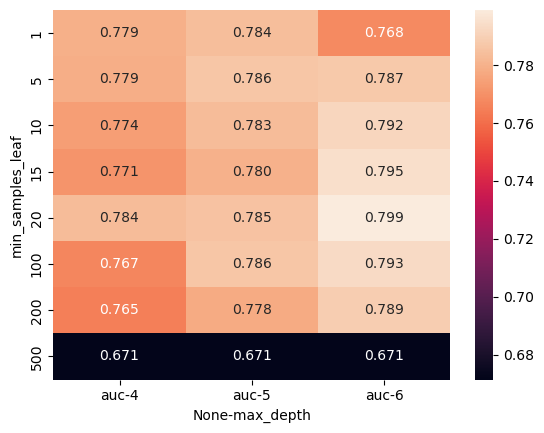

In [375]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [376]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [377]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 73.50
|   |   |   |--- expenses <= 71.00
|   |   |   |   |--- seniority <= 1.50
|   |   |   |   |   |--- time <= 30.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- time >  30.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- seniority >  1.50
|   |   |   |   |   |--- marital=married <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- marital=married >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- expenses >  71.00
|   |   |   |   |--- time <= 54.00
|   |   |   |   |   |--- assets <= 3586.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- assets >  3586.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- time >  54.00
|   |   |   |   |   |--- class: 1
|   |   |--- income >  73.50
|   |   |   |--- amount <= 1128.00
|   |   |   |   |--- assets <= 2600.00
|   |   |   |   |   |--- price <= 545.50
|   |   |   |   |   |   |--- cl

## 6.6 Ensembles and random forest

* Board of experts
* Ensembling models 
* Random forest - ensembling decision trees
* Tuning random forest

In [378]:
from sklearn.ensemble import RandomForestClassifier

In [379]:
rf =  RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [380]:
y_pred = rf.predict_proba(X_val)[:,1]

In [381]:
roc_auc_score(y_val, y_pred)

0.80941668005785

In [382]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [383]:
pd.DataFrame(scores)

,0,1
0,10,0.809417
1,20,0.835251
2,30,0.832906
3,40,0.830872
4,50,0.832235
5,60,0.831864
6,70,0.833122
7,80,0.834735
8,90,0.833292
9,100,0.833907


In [384]:
df_scores = pd.DataFrame(scores, columns =['n_estimators', 'auc'])

In [385]:
df_scores

,n_estimators,auc
0,10,0.809417
1,20,0.835251
2,30,0.832906
3,40,0.830872
4,50,0.832235
5,60,0.831864
6,70,0.833122
7,80,0.834735
8,90,0.833292
9,100,0.833907


In [386]:
import seaborn as sns

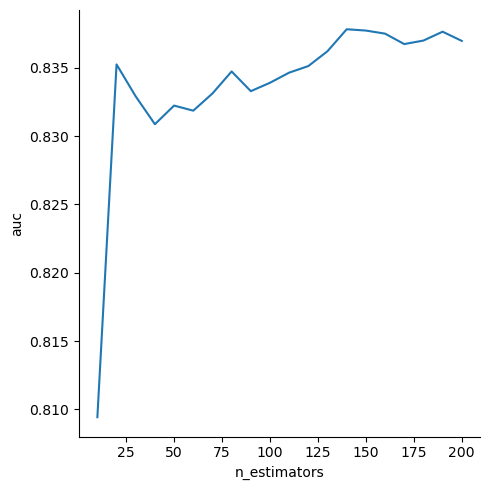

In [387]:
sns.relplot(data=df_scores, x='n_estimators', y='auc', kind='line')
plt.show()

From the analysis, it is observed that the random forest model is better than the decision tree model. The random forest model is trained on the training set and the accuracy is calculated on the validation set. Afte the iteration of the n_estimators=np.arange(10, 100, 10), we can see that the best n_estimators is 50.

We need to iterate over the max_depth and min_samples_leaf to get the best parameters for the random forest model.

In [388]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

KeyboardInterrupt: 

In [76]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [ ]:
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.816836
1,5,20,0.822065
2,5,30,0.822084
3,5,40,0.824846
4,5,50,0.828793


Visualising the data to see the best parameters for the random forest model.

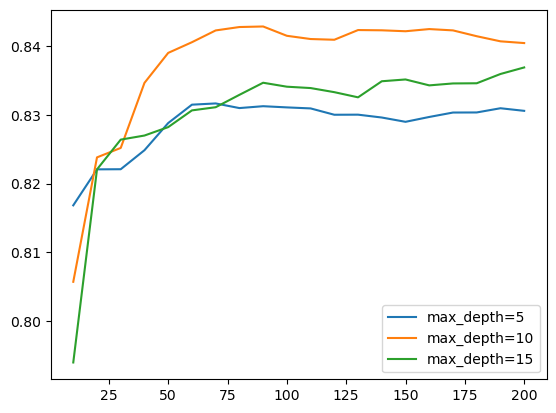

In [78]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [79]:
max_depth = 10

In [80]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [81]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

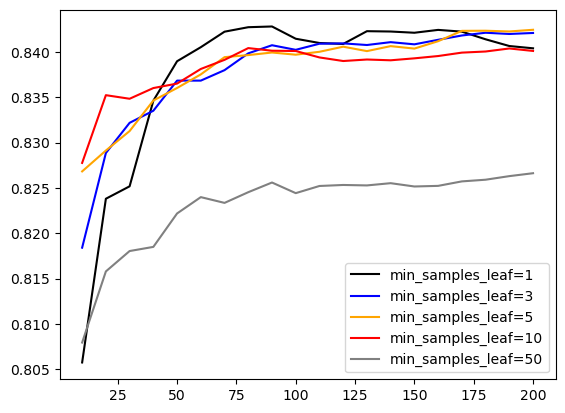

In [ ]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [83]:
min_samples_leaf = 3

In [84]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

_____

## 6.7 Gradient boosting and XGBoost

* Gradient boosting vs random forest
* Installing XGBoost
* Training the first model
* Performance monitoring
* Parsing xgboost's monitoring output

In [209]:
import xgboost as xgb

In [210]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [211]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [212]:
y_pred= model.predict(dval)

In [213]:
roc_auc_score(y_val, y_pred)

0.8240583937996762

In [214]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [215]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [216]:
s = output.stdout

In [217]:
print(s[:200])

[0]	train-auc:0.85926	val-auc:0.80044
[5]	train-auc:0.92307	val-auc:0.81749
[10]	train-auc:0.94811	val-auc:0.82719
[15]	train-auc:0.96108	val-auc:0.82606
[20]	train-auc:0.97269	val-auc:0.82514
[25]	tr


To incorporate the result above, the `s` will be split into train and test set using a function  below

In [218]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [219]:
df_score = parse_xgb_output(output)

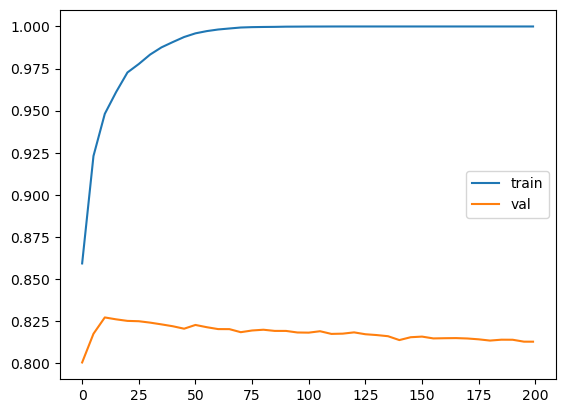

In [ ]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

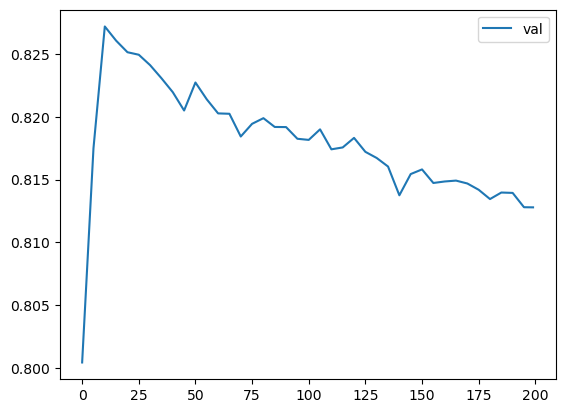

In [ ]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

## 6.8 XGBoost parameter tuning

Tuning the following parameters:

* `eta`
* `max_depth`
* `min_child_weight`

This is to check the `eta` of the model. Recalling the xgbg_params is the parameter of the model.

In [251]:
scores = {}

In [252]:
%%capture output

xgb_params = {
    'eta': 1.0, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
        verbose_eval=5,
        evals=watchlist)

In [253]:
scores = {}

In [254]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=1.0'

In [256]:
# Ensure the key 'eta=0.01' is added to the scores dictionary
scores['eta=0.01'] = parse_xgb_output(output)
scores['eta=0.01']

,num_iter,train_auc,val_auc
0,0,0.85926,0.80044
1,5,0.95748,0.78805
2,10,0.98777,0.78547
3,15,0.99536,0.78937
4,20,0.99852,0.79633
5,25,0.99950,0.79851
6,30,0.99997,0.79733
7,35,1.00000,0.80070
8,40,1.00000,0.80049
9,45,1.00000,0.80192


In [257]:
scores.keys()

dict_keys(['eta=1.0', 'eta=0.01'])

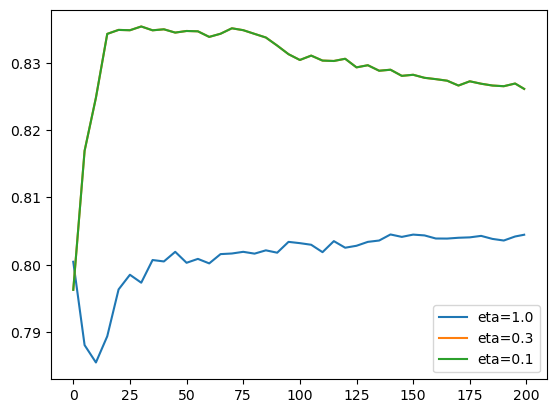

In [261]:
etas = ['eta=1.0', 'eta=0.3', 'eta=0.1']

# Ensure all keys are added to the scores dictionary
for eta in etas:
    if eta not in scores:
        scores[eta] = parse_xgb_output(output)

for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

In [262]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [263]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

In [264]:
del scores['max_depth=10']

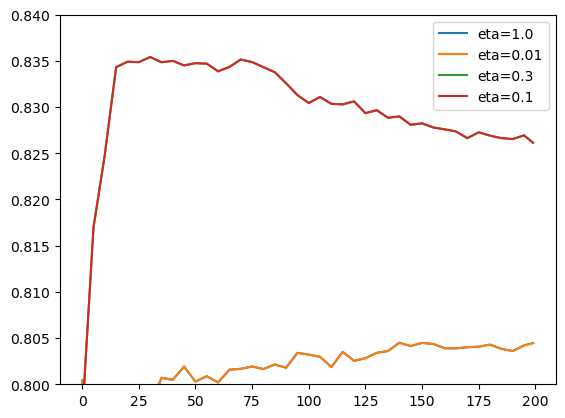

In [265]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.8, 0.84)
plt.legend()

## 6.9 Selecting the final model

* Choosing between xgboost, random forest and decision tree
* Training the final model
* Saving the model

In [403]:
# model 1: Decision Tree
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [404]:
# predict the validation dataset from model 1
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7949480216071891

In [405]:
# model 2: Random Forest
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,  # Set to an appropriate integer value
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [406]:
# predict the validation dataset from model 2
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8421055884497956

In [407]:
# model 3: XGBoost
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [408]:
# predict the validation dataset from model 3
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8420437829886649

After setting the three models, we can now train the final model and save the model.

In [409]:
# Recalling the full training dataset
df_full_train.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
1860,ok,6,other,30,22,single,no,fixed,35,73.0,0.0,0.0,1086,1086
4154,ok,45,owner,30,64,married,no,freelance,45,157.0,20000.0,0.0,1000,1588
1754,ok,2,owner,60,30,married,yes,fixed,45,174.0,4000.0,0.0,2000,2250
1779,ok,11,rent,60,28,married,no,fixed,59,144.0,0.0,0.0,1225,1360
279,ok,2,parents,36,19,married,no,fixed,35,162.0,4000.0,100.0,400,570


In [410]:
#  reset the index of the dataset
df_full_train = df_full_train.reset_index(drop=True)

In [411]:
# recalling the target columns, and assigning the target columns to the y_full_train
y_full_train = (df_full_train.status == 'default').astype(int).values

In [412]:
# drop the status columns from the dataset
del df_full_train['status']

In [413]:
# convert the dataset to a dictionary
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

From all the model above, we will be using the model 3 as the best model to predict the default of the client.

In [418]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=list(dv.get_feature_names_out()))

dtest = xgb.DMatrix(X_test, feature_names=list(dv.get_feature_names_out()))

In [419]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

In [420]:
y_pred = model.predict(dtest)

In [421]:
roc_auc_score(y_test, y_pred)

0.8354869171278643

## 6.10 Summary

* Decision trees learn if-then-else rules from data.
* Finding the best split: select the least impure split. This algorithm can overfit, that's why we control it by limiting the max depth and the size of the group.
* Random forest is a way of combininig multiple decision trees. It should have a diverse set of models to make good predictions.
* Gradient boosting trains model sequentially: each model tries to fix errors of the previous model. XGBoost is an implementation of gradient boosting. 

## 6.11 Explore more

* For this dataset we didn't do EDA or feature engineering. You can do it to get more insights into the problem.
* For random forest, there are more parameters that we can tune. Check `max_features` and `bootstrap`.
* There's a variation of random forest caled "extremely randomized trees", or "extra trees". Instead of selecting the best split among all possible thresholds, it selects a few thresholds randomly and picks the best one among them. Because of that extra trees never overfit. In Scikit-Learn, they are implemented in `ExtraTreesClassifier`. Try it for this project.
* XGBoost can deal with NAs - we don't have to do `fillna` for it. Check if not filling NA's help improve performance.
* Experiment with other XGBoost parameters: `subsample` and `colsample_bytree`.
* When selecting the best split, decision trees find the most useful features. This information can be used for understanding which features are more important than otheres. See example here for [random forest](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html) (it's the same for plain decision trees) and for [xgboost](https://stackoverflow.com/questions/37627923/how-to-get-feature-importance-in-xgboost)
* Trees can also be used for solving the regression problems: check `DecisionTreeRegressor`, `RandomForestRegressor` and the `objective=reg:squarederror` parameter for XGBoost.